# 생물통계학 기말 과제_toenail
> tonail 데이터를 이용한 분석 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연

The researchers have conducted a clinical trial to investigate the effects of two oral treatments for *toenail dermatophyte onychomycosis*, a common infection of the toenail. Here is some background.

**Onychomycosis**, known popularly as toenail fungus, is a fairly common condition that not only can disfigure and sometimes destroy the nail but that also can lead to social and self-image issues for sufferers. It has been estimated that between 2% and 18% of of people world-wide and up to 5% of people in the United States are afflicted by some form of onychomycosis. The likelihood of affliction is rare among children under 18 but increases with age, and it is estimated that up to 48% of people have had at least one episode by the age of 70. The big toe and little toe are the most likely to be afflicted. Tight-fitting shoes or hosiery, the sharing of common facilities such as showers and locker rooms, and toenail polish are all thought to be implicated in the development of onychomycosis.

Onychomycosis is distinguished by discoloration of the toenail, which itself becomes thick, overgrown, and crusted with debris. This condition is often accompanied by a foul-smelling odor caused by accumulation of debris under the nails. In various versions of the disease, the nail may crumble and gradually fall off, become so thick that wearing shoes causes extreme discomfort, or develop a soft, powdery surface.

Onychomycosis can be caused by several types of fungi known as dermatophytes, as well as by nondermatophytic yeasts or molds. The study conducted by the researchers involved sufferers of the particular type caused by dermatophytes.

The standard approach to treatment of toenail dermatophyte onychomycosis involves removal of as much of the afflicted part of the nail as possible, followed by application of a topical antifungal ointment or by a course of treatment with an oral antifungal medication, for which better outcomes are generally obtained than with ointments. The study conducted by the researchers was focused on comparison of two oral medications, **terbinane (given as 250 mg/day, denoted as treatment 1 below)** and **itraconazole (given as 200 mg/day, denoted as treatment 2 below)**.

The trial was conducted as follows. **200 sufferers** of advanced toenail dermatophyte onychomycosis in the big toe were recruited, and each saw a physician, who removed the afflicted nail as described above. Each subject was then **randomly** assigned to treatment with either terbinane (treatment 1) or itraconazole (treatment 2). Immediately prior to beginning treatment, **the length of the unafflicted part of the toenail (which was hence not removed) was recorded (in millimeters)**. **Then at 1 month, 2 months, 3 months, 6 months, and 12 months, each subject returned**, and the length of the unafflicted part of the nail was **measured **again**. Intuitively, as the nail grows out (hopefully without signs of onychomycosis, due to the eects of treatment), **this length is likely to increase if the treatments are working, with the better treatment resulting in longer unafflicted nail lengths on average**.

Also recorded on each subject was gender and an indictor of the frequency with which the subject visited a gym or health club (and hence might use shared locker rooms and/or showers).

The data are available in the file `toenail.txt`. The data are presented in the form of one data record per observation; the columns of the data set are as follows:

1. Subject id
2. Health club frequency indicator (= 0 if once a week or less, = 1 if more than once a week)
3. Gender indicator (= 0 if female, = 1 if male)
4. Month
5. Unafflicted nail length (the response, mm)
6. Treatment indicator (= 1 if terbinane, = 2 if itraconazole)

The researchers had several questions, which they stated to you as follows:

In [203]:
library(ggplot2) 
library(plyr)
library(ggExtra)

In [204]:
toenail<-read.table("toenail.txt", sep = "")
colnames(toenail)<-c("Subject","Healthclb","Gender","Month","Unaff","TR")
#head(toenail)
#str(toenail)

In [205]:
#toenail$Subject<-as.character(toenail$Subject)
toenail$TR<-ifelse(toenail$TR==1,"terbinane","itraconazole")
toenail$TR<-factor(toenail$TR,levels=c("terbinane","itraconazole"))
toenail$Gender<-ifelse(toenail$Gender==1,"Male","Female")
toenail$Gender<-as.factor(toenail$Gender)
toenail$Healthclb<-as.factor(toenail$Healthclb)

#### 1) Is there evidence to suggest that these two oral medications differ in their effects on toenail dermatophyte onychomycosis, as reflected by the lengths of the unafflicted part of the nail?

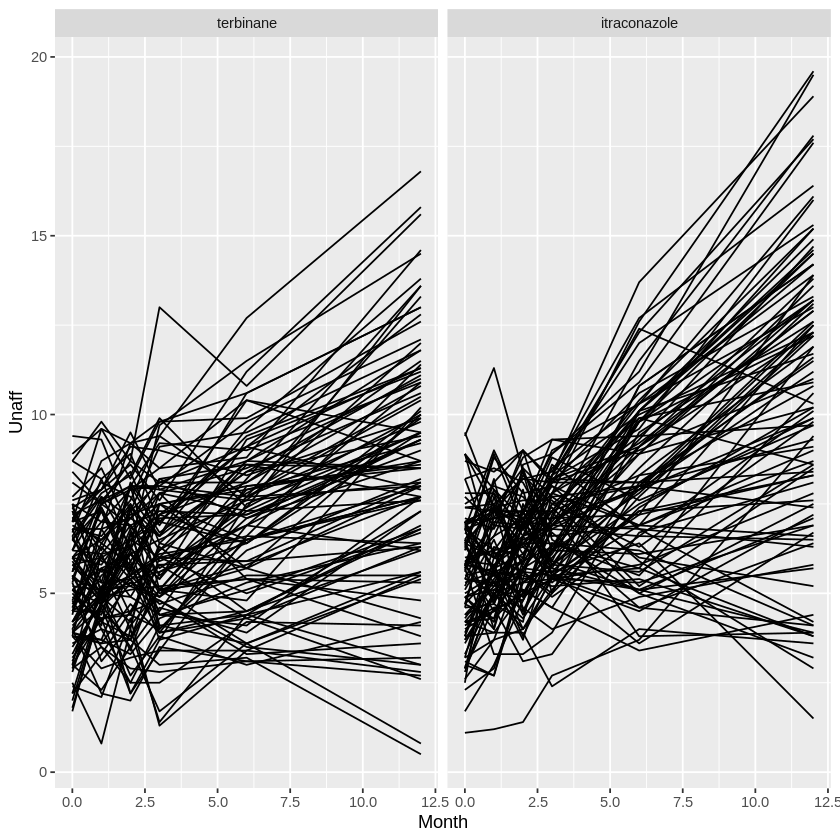

In [230]:
ggplot(toenail,aes(x=Month, y=Unaff, group=Subject)) + geom_line()+ facet_grid(~TR)

- terbinane이 itraconazole보다 기울기가 작은 것처럼 보인다.
- 즉, 더 느리게 발톱이 길어지는 것처럼 보인다.

In [220]:
tapply(toenail$Unaff, toenail$TR, mean)

terbinane itraconazole 
    6.427333     7.125333

- treatment 별 발톱 길이의 평균이다.

Bar plot

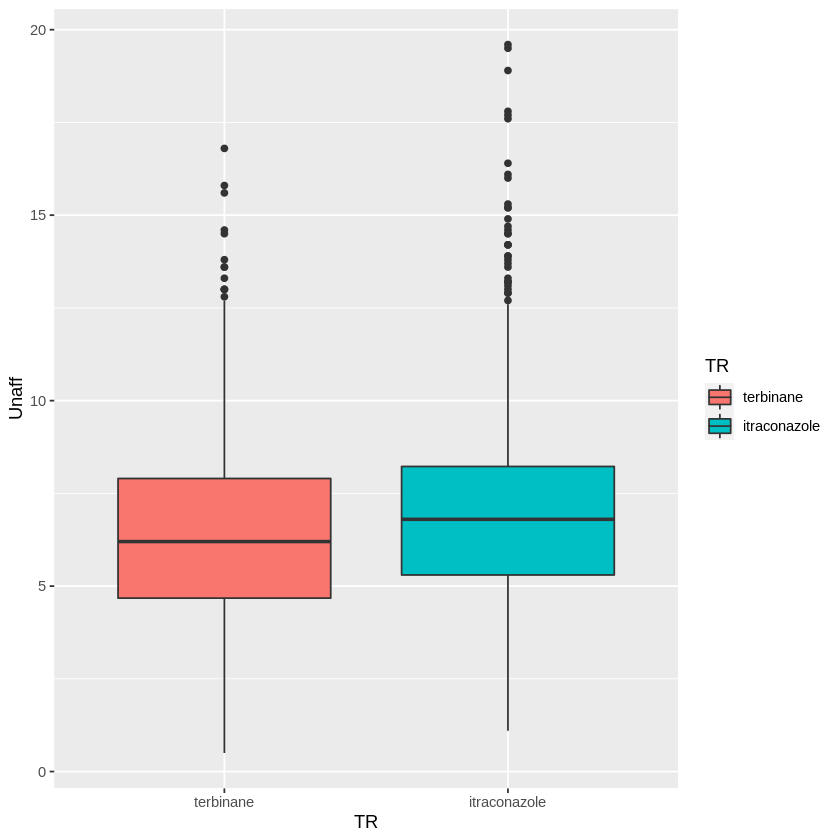

In [232]:
ggplot(toenail,aes(x=TR, y=Unaff,group=TR)) +  geom_boxplot(aes(fill=TR))#+ facet_wrap( ~ TR)

- terbinane이 itraconazole보다 평균이 낮음을 확인해보았다.

In [234]:
var.test(subset(toenail,TR=="terbinane")$Unaff,subset(toenail,TR=="itraconazole")$Unaff)


	F test to compare two variances

data:  subset(toenail, TR == "terbinane")$Unaff and subset(toenail, TR == "itraconazole")$Unaff
F = 0.75132, num df = 599, denom df = 599, p-value = 0.0004802
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6400281 0.8819585
sample estimates:
ratio of variances 
         0.7513176 


- 등분산 가정을 만족하지 않음을 알 수 있었다.

In [235]:
t.test(subset(toenail,TR=="terbinane")$Unaff,subset(toenail,TR=="itraconazole")$Unaff)


	Welch Two Sample t-test

data:  subset(toenail, TR == "terbinane")$Unaff and subset(toenail, TR == "itraconazole")$Unaff
t = -4.4983, df = 1174.3, p-value = 7.529e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0024395 -0.3935605
sample estimates:
mean of x mean of y 
 6.427333  7.125333 


- Welch Two Sample t-test 결과 귀무가설을 기각하여
- 대립가설인 두 treatment 간 차이가 0이 아니다를 채택하였다.
- 따라서 두 treatment 간 차이가 있다는 evidence 를 제시할 수 있었다.

#### 2) Is there a difference in the pattern of change of lengths of the unafflicted part of the nail between subjects receiving terbinane and itraconazole over a 12 month period? Does one treatment show results more quickly?

In [236]:
lm(Unaff ~ Month, subset(toenail,TR=="terbinane"))
lm(Unaff ~ Month, subset(toenail,TR=="itraconazole"))


Call:
lm(formula = Unaff ~ Month, data = subset(toenail, TR == "terbinane"))

Coefficients:
(Intercept)        Month  
     5.3414       0.2715  



Call:
lm(formula = Unaff ~ Month, data = subset(toenail, TR == "itraconazole"))

Coefficients:
(Intercept)        Month  
     5.4421       0.4208  


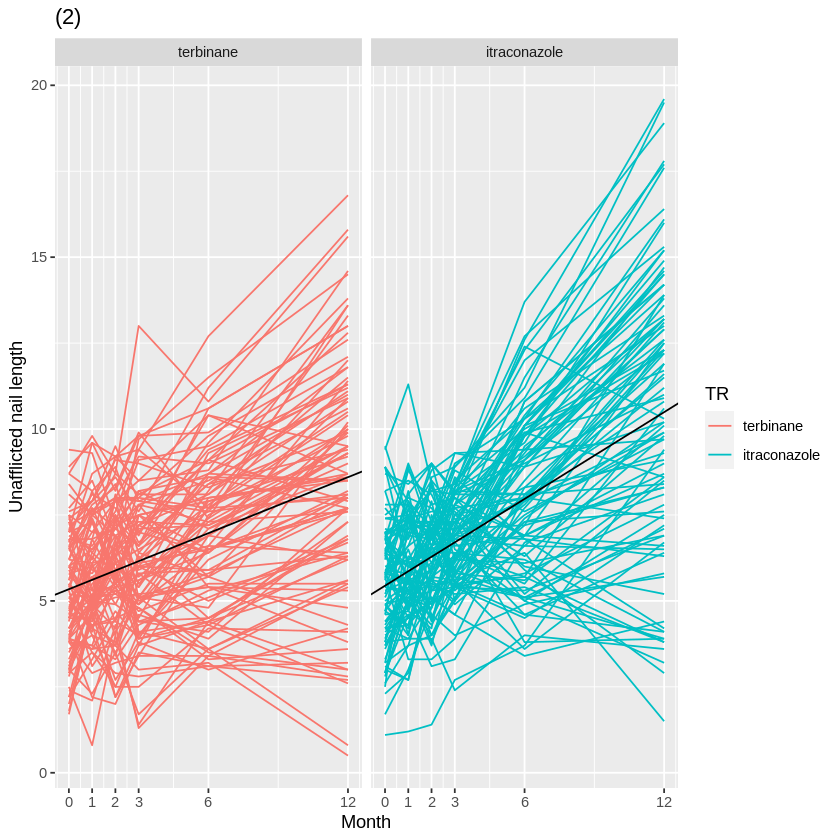

In [237]:
int   <- c(5.3414,5.4421)
slope <- c(0.2715,0.4208)
TR  <- c("terbinane","itraconazole")
ref   <- data.frame(int, slope, TR)
ref$TR<-factor(ref$TR,levels=c("terbinane","itraconazole"))
ggplot(toenail,aes(x=Month, y=Unaff,group=Subject, colour=TR))+ geom_line()+ ggtitle('(2)')+
  labs( x='Month', y="Unafflicted nail length") + 
  geom_abline(data = ref, aes(intercept=int, slope=slope))+facet_wrap(~TR)+
  scale_x_continuous(breaks=c(0,1,2,3,6,12), label=c('0','1','2','3','6','12'))

In [240]:
toenail_m <- data.frame(aggregate(Unaff ~ TR+Month, toenail, mean))

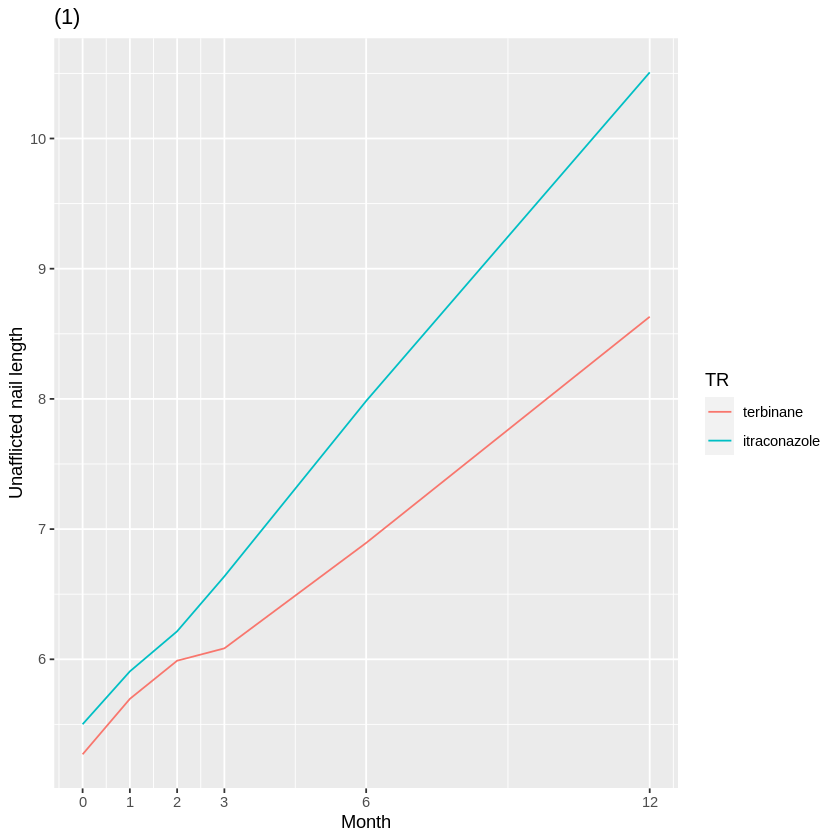

In [241]:
ggplot(toenail_m,aes(x=Month, y=Unaff,group=TR,colour=TR))+ geom_line()+ ggtitle('(1)')+
  labs( x='Month', y="Unafflicted nail length")+
  scale_x_continuous(breaks=c(0,1,2,3,6,12), label=c('0','1','2','3','6','12'))

- Month 별, TR 별 평균을 구해 그림을 그려보니 itraconazole의 기울기가 가파르기 떄문에 terbinane에 비해 더 빨리 치료됨을 알 수 있었다.

#### 3) What is the difference in lengths of the unafflicted part of the nail at the end of the study? Is there evidence to suggest that one of the treatments produces longer lengths on average than the other after 12 months?

In [246]:
tapply(subset(toenail,Month==12)$Unaff, subset(toenail,Month==12)$TR, mean)

terbinane itraconazole 
       8.631       10.508

- terbinane이 itraconazole보다 평균이 작았다.

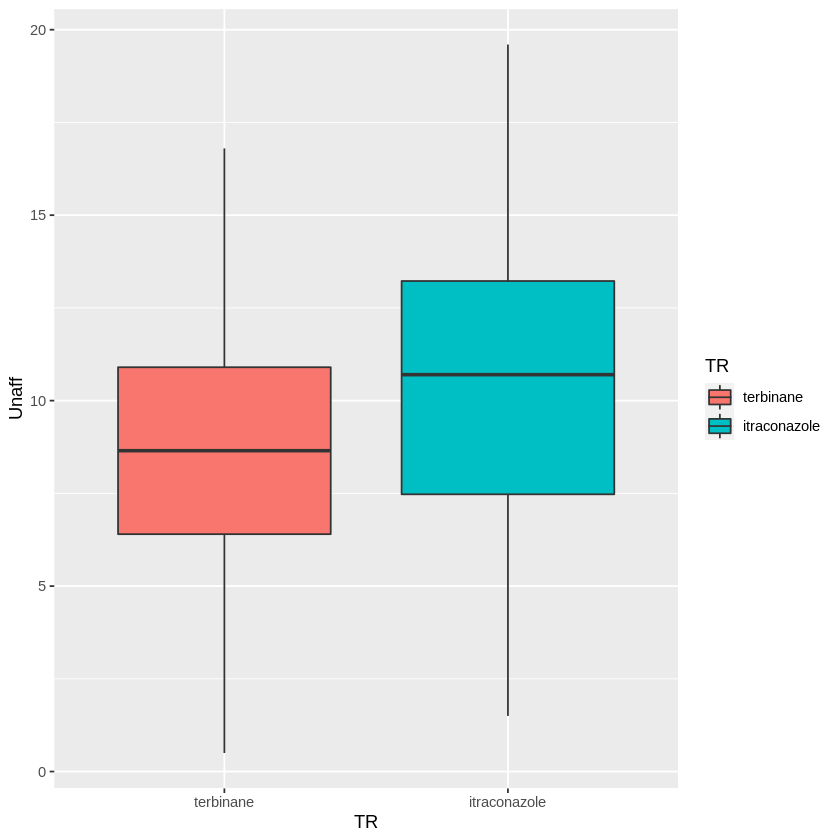

In [244]:
ggplot(subset(toenail,Month==12),aes(x=TR, y=Unaff,group=TR)) +  geom_boxplot(aes(fill=TR))#+ facet_wrap( ~ TR)

- 12월 부분만 추출하여 treatment 별 barplot을 그려보았다.
- terbinane이 itraconazole보다 평균이 작은 모습을 볼 수 있었다.

In [247]:
var.test(subset(subset(toenail,Month==12),TR=="terbinane")$Unaff,subset(subset(toenail,Month==12),TR=="itraconazole")$Unaff)


	F test to compare two variances

data:  subset(subset(toenail, Month == 12), TR == "terbinane")$Unaff and subset(subset(toenail, Month == 12), TR == "itraconazole")$Unaff
F = 0.66169, num df = 99, denom df = 99, p-value = 0.04114
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4452094 0.9834190
sample estimates:
ratio of variances 
         0.6616853 


- 등분산 가정을 만족하지 않음을 알 수 있었다.

In [248]:
t.test(subset(subset(toenail,Month==12),TR=="terbinane")$Unaff,subset(subset(toenail,Month==12),TR=="itraconazole")$Unaff)


	Welch Two Sample t-test

data:  subset(subset(toenail, Month == 12), TR == "terbinane")$Unaff and subset(subset(toenail, Month == 12), TR == "itraconazole")$Unaff
t = -3.5404, df = 190.12, p-value = 0.0005024
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.9227623 -0.8312377
sample estimates:
mean of x mean of y 
    8.631    10.508 


- Welch Two Sample t-test 결과 귀무가설을 기각하지 못하여
- 귀무가설인 두 treatment 간 차이가 0이다를 채택하였다.
- 따라서 12월에서 두 treatment 간 차이가 없다는 evidence 를 제시할 수 있었다.

#### 4) Recent literature reports have suggested that males tend to have more serious cases of onychomycosis than females. This would be reflected by an association between lengths of the unafficted part of the nail and gender in this population at the beginning of the study (before treatment), with lengths being shorter on average for males than for females (meaning that the disease a icts more of the nail in males). Is there evidence to suggest that this is the case?

In [249]:
toenail_mf <- data.frame(aggregate(Unaff ~ TR+Month+Gender, toenail, mean))
#arrange(toenail_mf,Month)

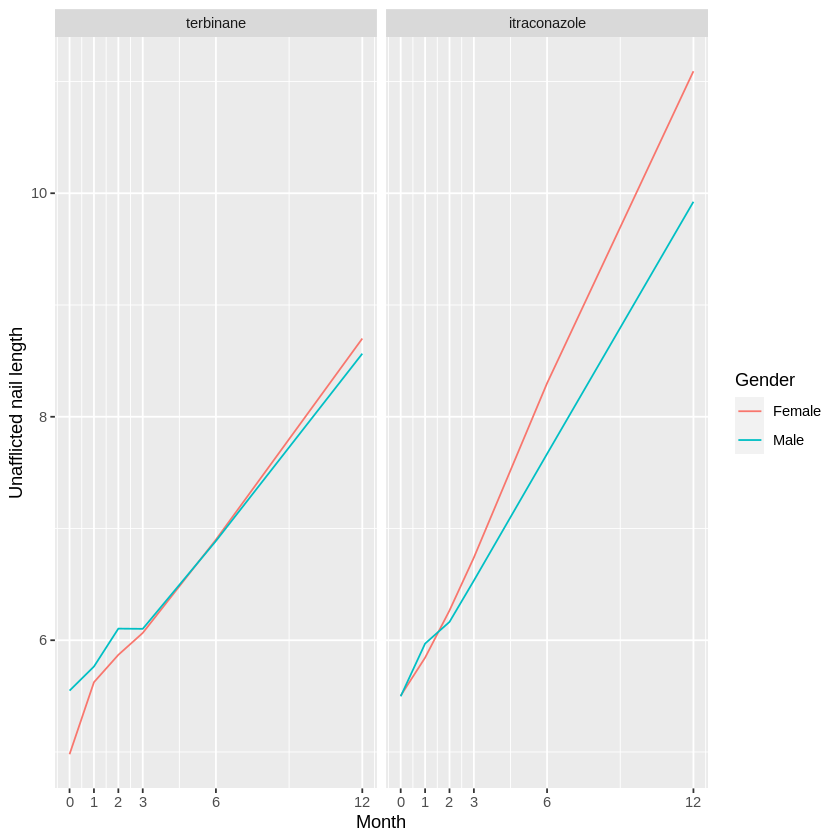

In [250]:
ggplot(toenail_mf,aes(x=Month, y=Unaff,group=Gender,colour=Gender))+ geom_line()+
  labs( x='Month', y="Unafflicted nail length") + facet_wrap(~TR)+
  scale_x_continuous(breaks=c(0,1,2,3,6,12), label=c('0','1','2','3','6','12'))

-  terbinane에서는 남성, 여성이 비슷하지만
-  itraconazole에서는 여성이 더 긴 모습이다.

- 여성보다 남성이 더 심각하다? 성별이 영향을 끼치는지 확인.

#### 5) As noted above, the time spent in shared locker rooms and showers is thought to be associated with developing onychomycosis. A recent report has further hypothesized that the severity of the disease is also associated with this practice. Is there evidence in these data that subjects in this population who spend more than one day per week at a gym or health club have nail lengths different from those who spend less time at the beginning of the study (before treatment)? (One might expect that shorter lengths would be seen in those who spend more time if this were true.)

In [158]:
toenail_gym <- data.frame(aggregate(Unaff ~ TR+Month+Healthclb, toenail, mean))
arrange(toenail_gym,Month)

TR,Month,Healthclb,Unaff
<fct>,<dbl>,<chr>,<dbl>
terbinane,0,0,6.051515
itraconazole,0,0,5.991176
terbinane,0,1,4.885075
itraconazole,0,1,5.248485
terbinane,1,0,6.396970
itraconazole,1,0,6.338235
terbinane,1,1,5.350746
itraconazole,1,1,5.684848
terbinane,2,0,6.709091


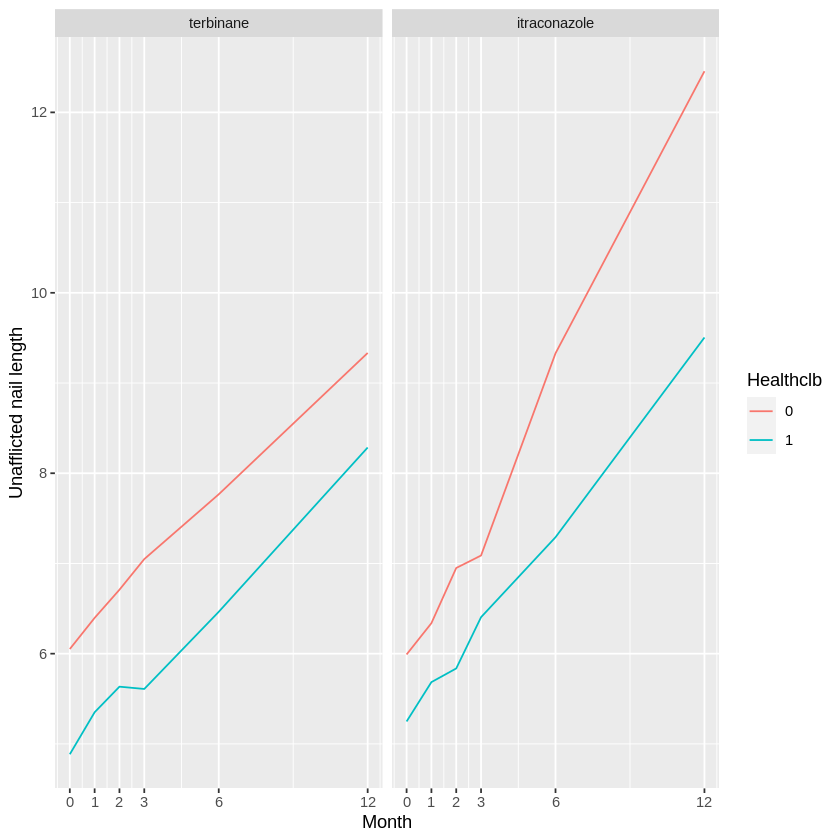

In [159]:
ggplot(toenail_gym,aes(x=Month, y=Unaff,group=Healthclb,colour=Healthclb))+ geom_line()+
  labs( x='Month', y="Unafflicted nail length") + facet_wrap(~TR)+
  scale_x_continuous(breaks=c(0,1,2,3,6,12), label=c('0','1','2','3','6','12'))

- 모든 Treatment 에서 Health club에 일주일에 하루 이상 간 사람의 발톱 길이가 평균적으로 매월 더 작았다.

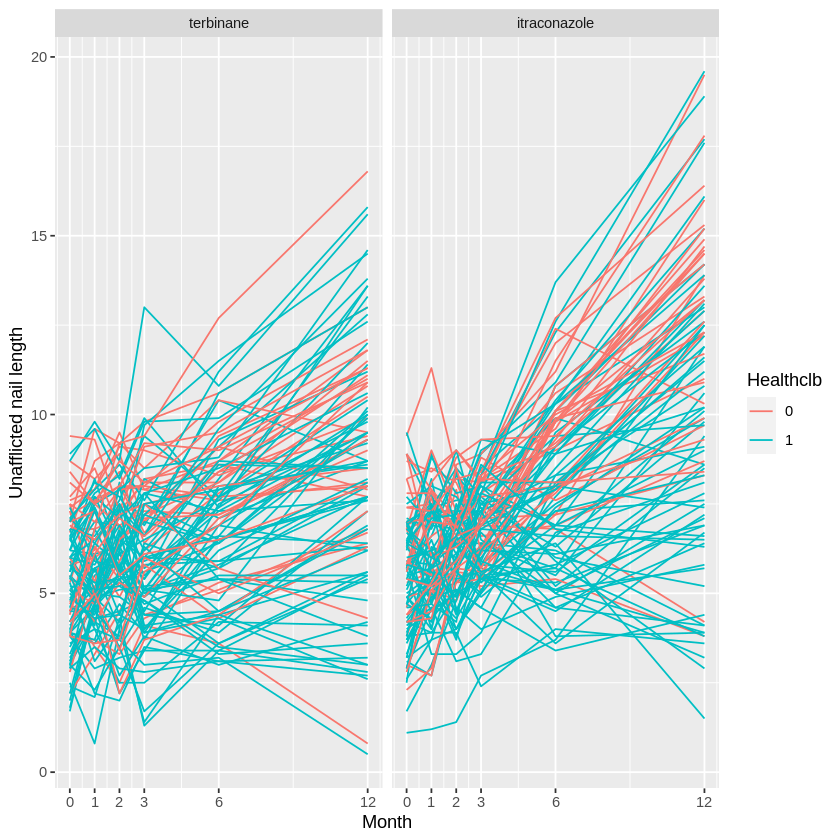

In [161]:
ggplot(toenail,aes(x=Month, y=Unaff,group=Subject,colour=Healthclb))+ geom_line()+
  labs( x='Month', y="Unafflicted nail length") + facet_wrap(~TR)+
  scale_x_continuous(breaks=c(0,1,2,3,6,12), label=c('0','1','2','3','6','12'))

#### 6) Is there an association between the pattern of change of nail lengths and gender and/or health club frequency in subjects taking terbinane? This might indicate that this drug brings about relief more swiftly in some kinds of subject versus others.

In [61]:
lm(Unaff ~ Month, subset(toenail_gym,TR=="terbinane"))
toenail_gym_mf <- data.frame(aggregate(Unaff ~ TR+Month+Healthclb+Gender, toenail, mean))
arrange(toenail_gym_mf,Month)
toenail_gym_mf_1 <- subset(toenail_gym_mf,TR=="terbinane")


Call:
lm(formula = Unaff ~ Month, data = subset(toenail_gym, TR == 
    "terbinane"))

Coefficients:
(Intercept)        Month  
     5.5447       0.2708  


TR,Month,Healthclb,Gender,Unaff
<fct>,<dbl>,<chr>,<chr>,<dbl>
terbinane,0,0,Female,5.540000
itraconazole,0,0,Female,5.950000
terbinane,0,1,Female,4.593103
itraconazole,0,1,Female,5.206667
terbinane,0,0,Male,6.838462
itraconazole,0,0,Male,6.050000
terbinane,0,1,Male,5.107895
itraconazole,0,1,Male,5.283333
terbinane,1,0,Female,6.355000


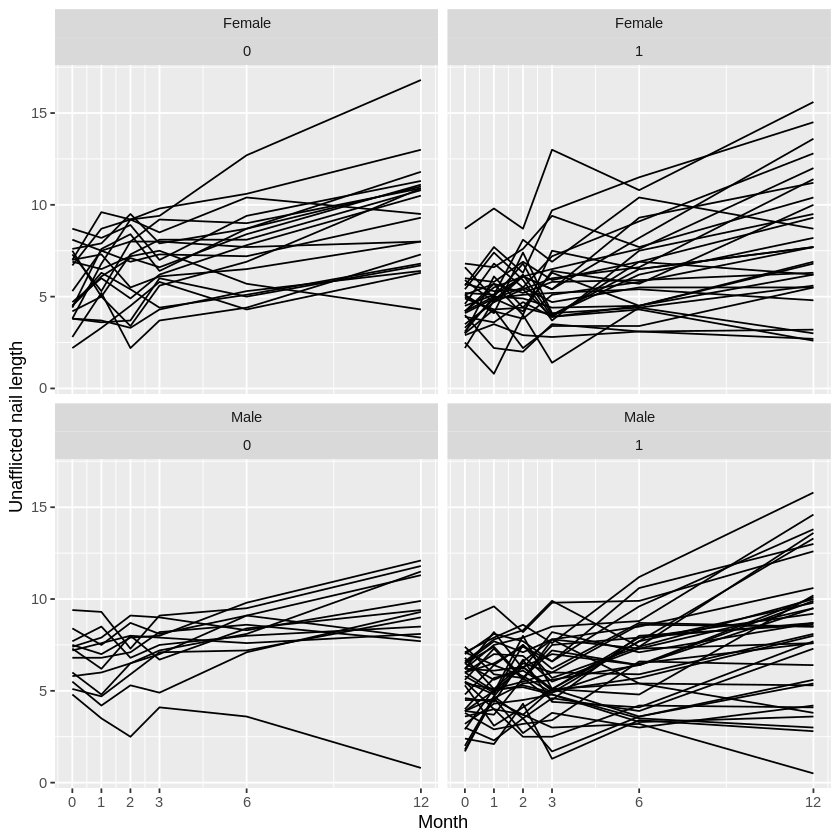

In [172]:
ggplot(subset(toenail,TR=="terbinane"),aes(x=Month, y=Unaff,group=Subject))+ geom_line()+
  labs( x='Month', y="Unafflicted nail length")  + facet_wrap(~Gender+Healthclb)+
  scale_x_continuous(breaks=c(0,1,2,3,6,12), label=c('0','1','2','3','6','12'))

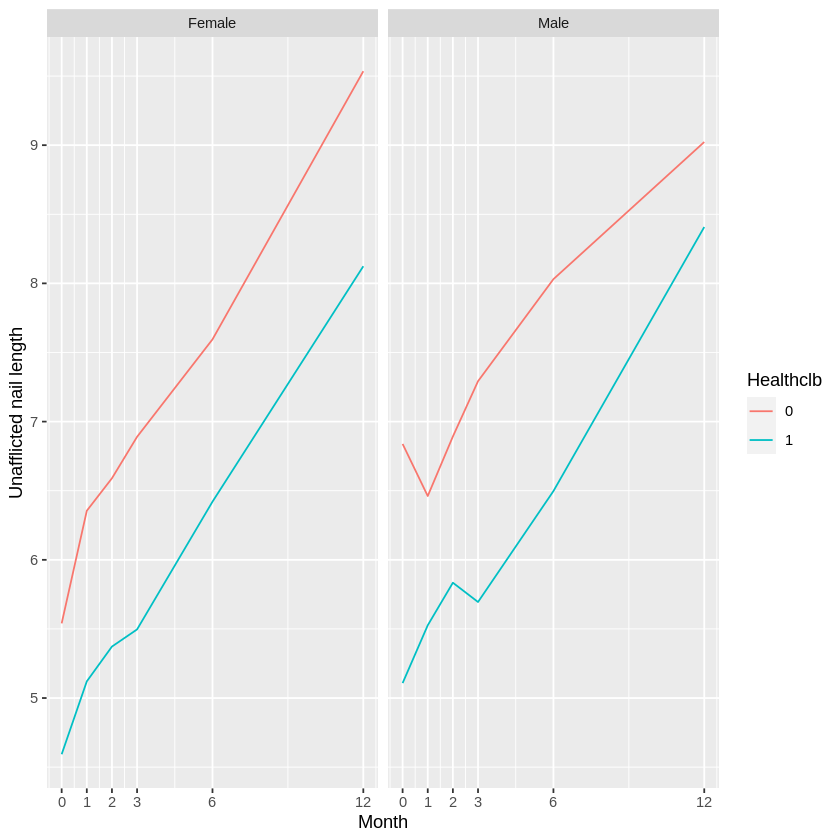

In [176]:
ggplot(toenail_gym_mf_1,aes(x=Month, y=Unaff,group=Healthclb,colour=Healthclb))+ geom_line()+
  labs( x='Month', y="Unafflicted nail length")  + facet_wrap(~Gender)+
  scale_x_continuous(breaks=c(0,1,2,3,6,12), label=c('0','1','2','3','6','12'))

- terbinane을 복용한 대상자들

#### 7) Is there an association between the pattern of change of nail lengths and gender and/or health club frequency in subjects taking itraconazole? This might indicate that this drug brings about relief more swiftly in some kinds of subject versus others.

In [63]:
lm(Unaff ~ Month, subset(toenail_gym,TR=="itraconazole"))
toenail_gym_mf_2 <- subset(toenail_gym_mf,TR=="itraconazole")


Call:
lm(formula = Unaff ~ Month, data = subset(toenail_gym, TR == 
    "itraconazole"))

Coefficients:
(Intercept)        Month  
     5.5307       0.4532  


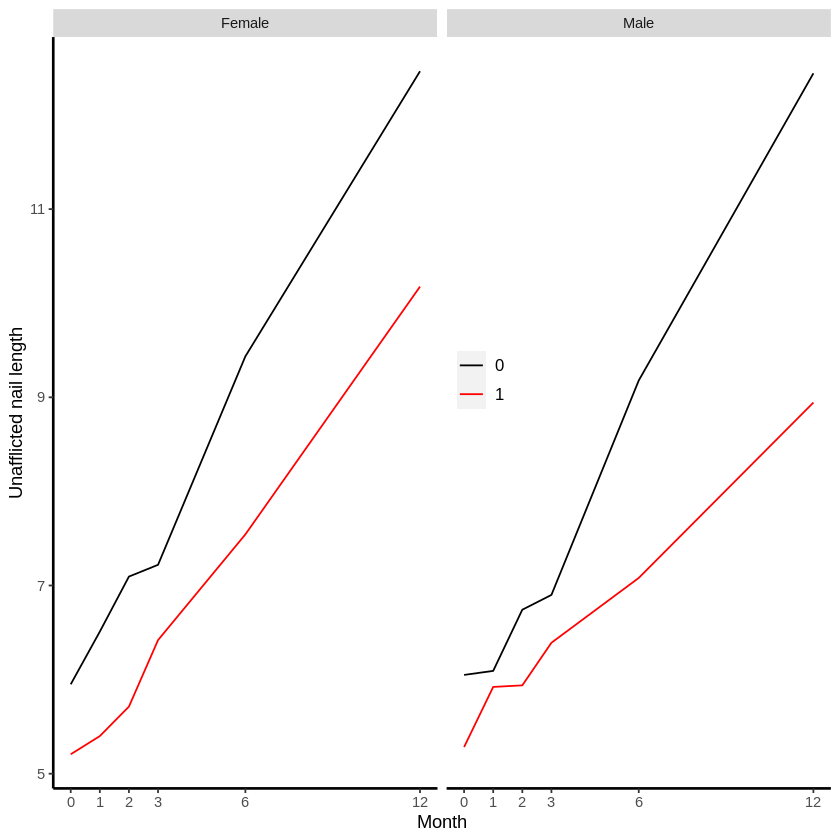

In [64]:
ggplot(toenail_gym_mf_2,aes(x=Month, y=Unaff,group=Healthclb,colour=Healthclb))+ geom_line()+
  scale_colour_manual(values=c("black", "red"))+
  labs( x='Month', y="Unafflicted nail length")  + facet_wrap(~Gender)+
  scale_x_continuous(breaks=c(0,1,2,3,6,12), label=c('0','1','2','3','6','12'))+
  theme(legend.position=c(.55,.55),legend.title=element_blank(),
        legend.text=element_text(size=10, hjust=0),panel.background=element_blank(),
        axis.line.x=element_line(colour='black', size=0.75),
        axis.line.y=element_line(colour='black', size=0.75))